<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW7PGalvezMolina/HW7PGalvezMolina_clusteringGenes_instructionsDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]
!pip install missingno
!pip install zca

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
import missingno as msno
from zca import ZCA
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import scipy.spatial.distance as spd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv', index_col = 0)

In [4]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [5]:
genes.shape

(4224, 74)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

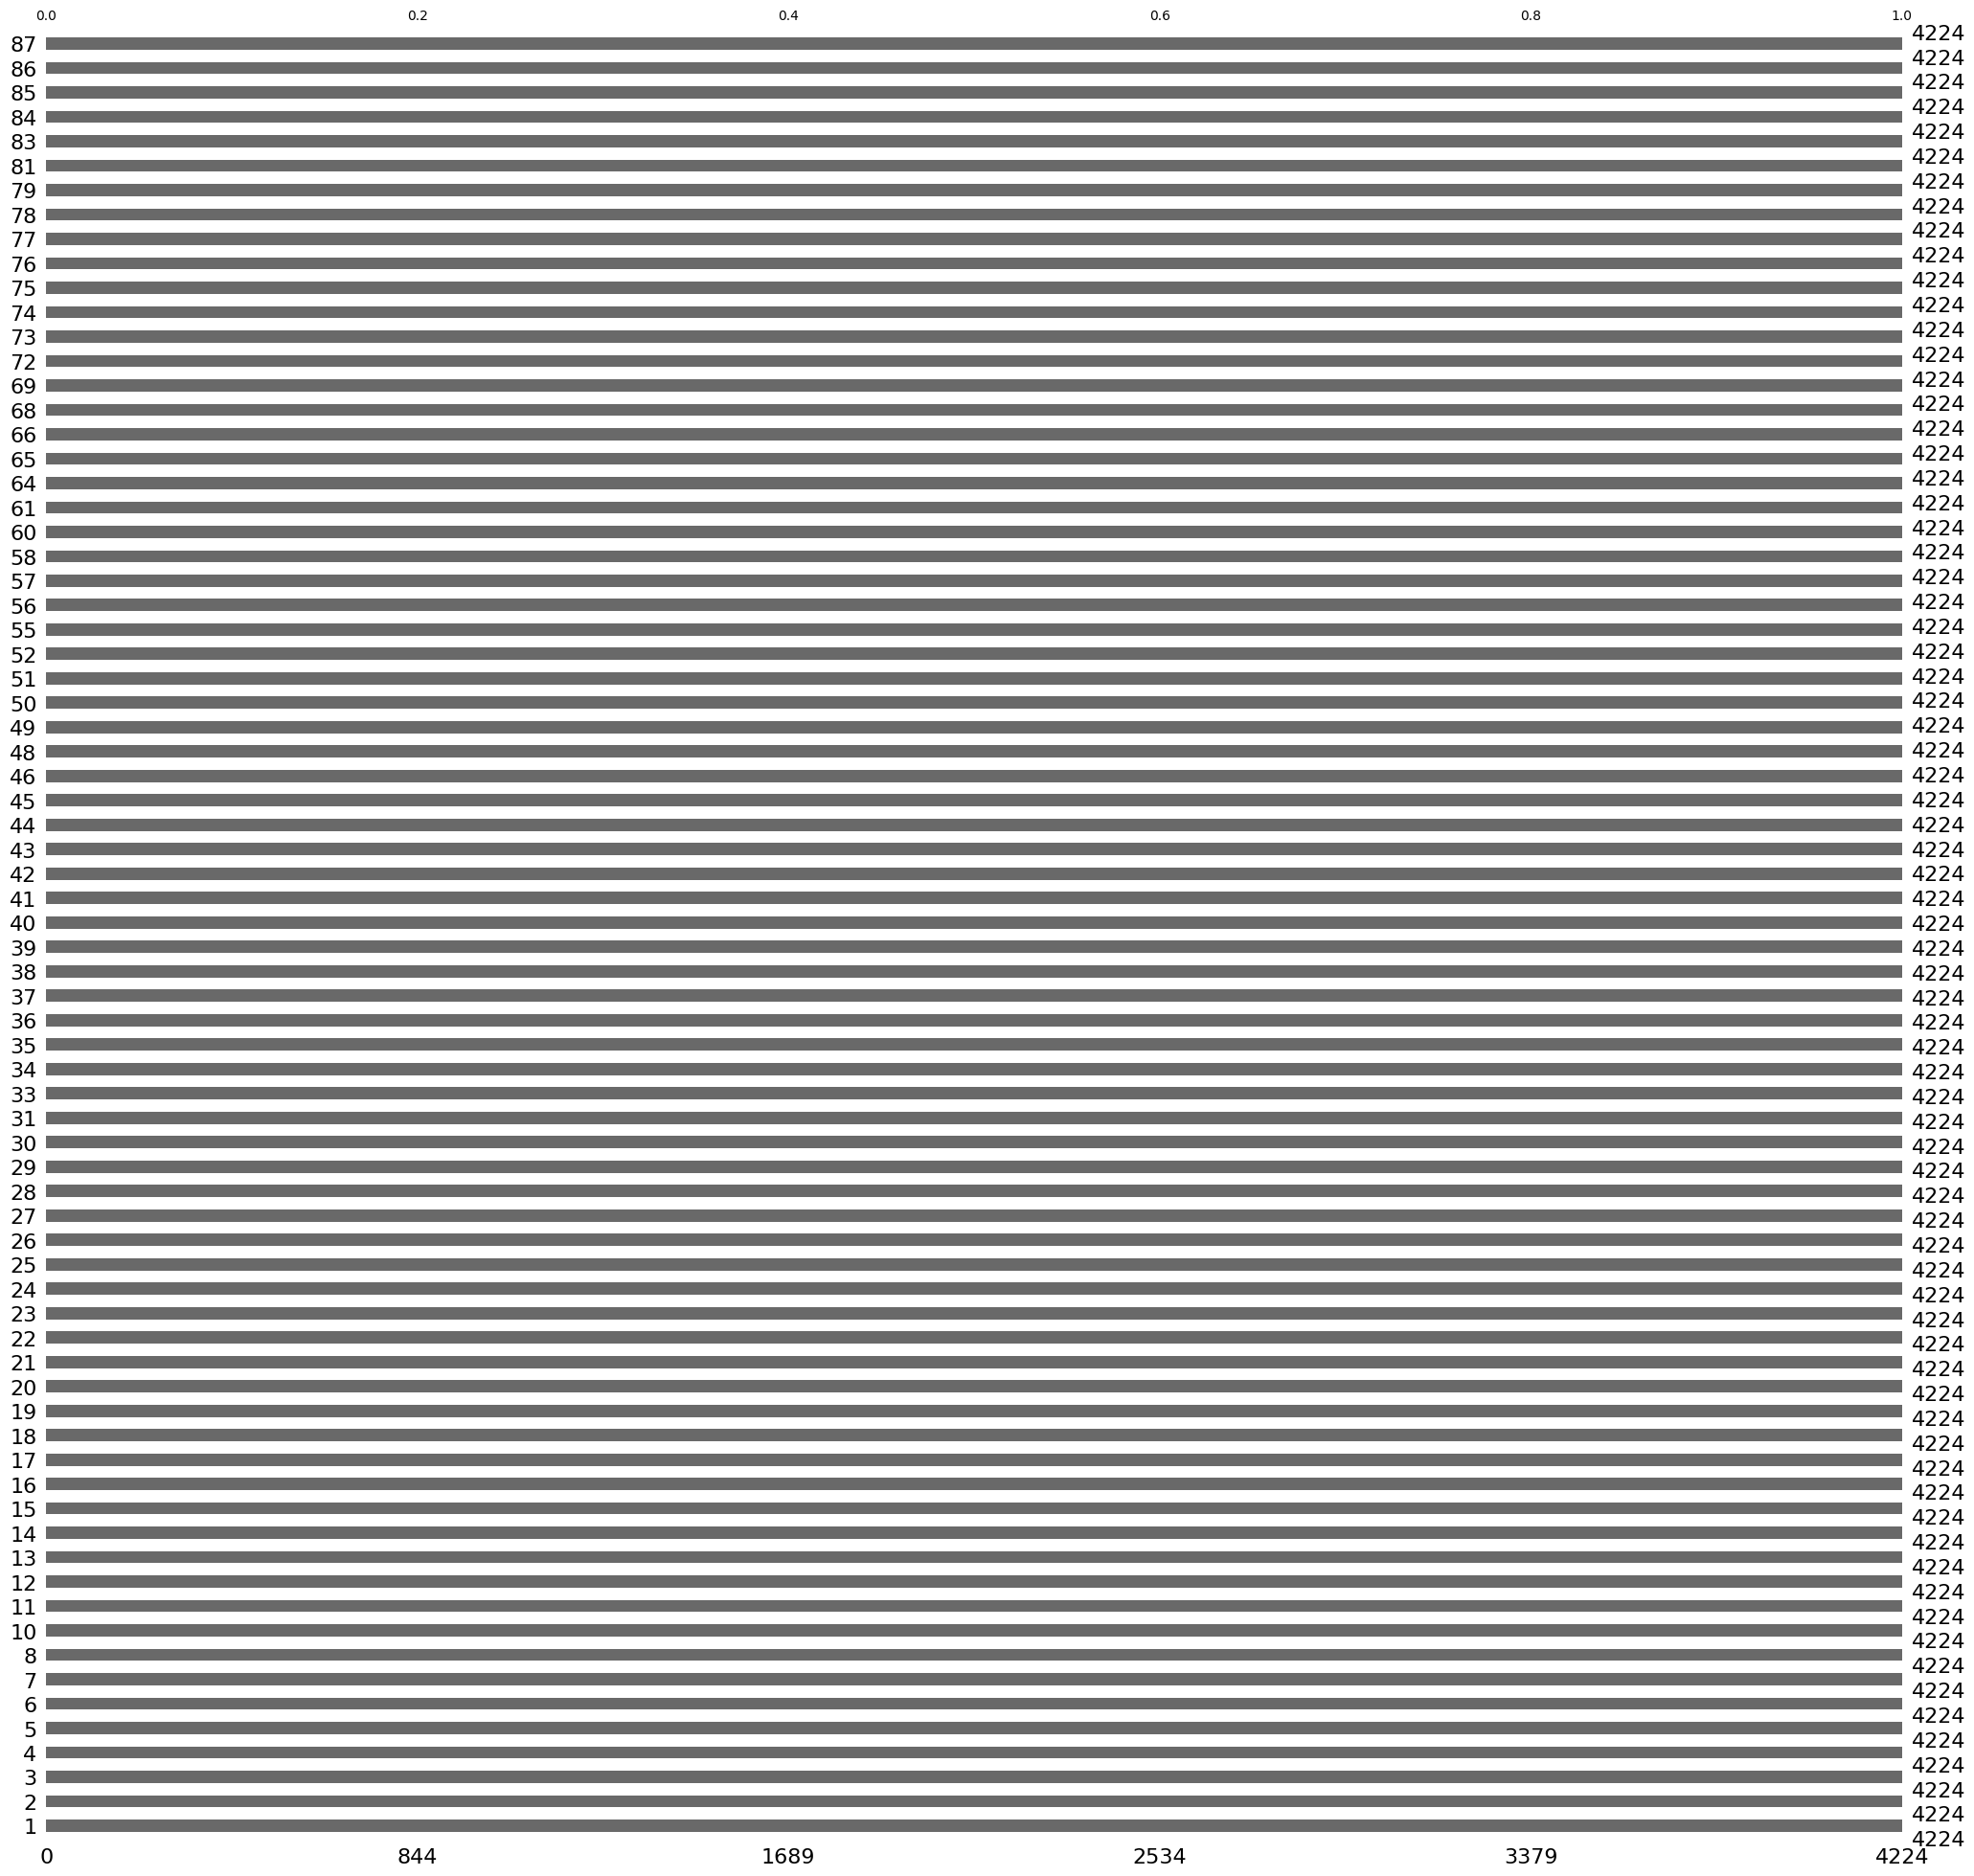

In [6]:

# Visualize missing values as a matrix
# msno.matrix(genes)
msno.bar(genes)
# msno.heatmap(genes)

### **Fig. 1.** Bar chart displaying number of values per colunn. All columns display 4,224 values which mean there are no values missing. Graph constructed using the missingno package.

### It seems there are no NaNs in our given data set. If there were, I would remove the column (patient sample) from my database as we do not have complete information on them.

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [7]:
scaledgenes = (genes - genes.mean())/genes.std()

We used the normalization because the we do not wish to switch the space (i.e. we want to mantain the integrity  of what the features represent).

In [8]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(1     0.0
 2    -0.0
 3     0.0
 4     0.0
 5    -0.0
      ... 
 83   -0.0
 84    0.0
 85    0.0
 86    0.0
 87    0.0
 Length: 74, dtype: float64,
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 5     1.0
      ... 
 83    1.0
 84    1.0
 85    1.0
 86    1.0
 87    1.0
 Length: 74, dtype: float64)

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [9]:
skl.manifold.TSNE?

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [10]:
# Trial 1
twodproj = skl.manifold.TSNE(n_components = 2)
twodproj = twodproj.fit_transform(scaledgenes)

In [11]:
twodproj2 = skl.manifold.TSNE(n_components = 2, perplexity = 100)
twodproj2 = twodproj2.fit_transform(scaledgenes)

In [12]:
twodproj3 = skl.manifold.TSNE(n_components = 2, perplexity = 5)
twodproj3 = twodproj3.fit_transform(scaledgenes)

In [13]:
twodproj4 = skl.manifold.TSNE(n_components = 2, early_exaggeration = 5, perplexity = 5)
twodproj4 = twodproj4.fit_transform(scaledgenes)

In [14]:
twodproj.shape

(4224, 2)

plot the TSNE 2D projection


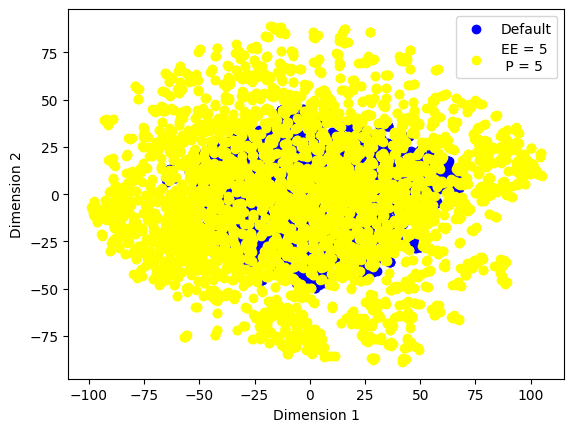

In [15]:
plt.scatter(twodproj[:,0], twodproj[:,1], color = 'blue', label = 'Default')
# plt.scatter(twodproj2[:,0], twodproj2[:,1], color = 'pink', label = 'P = 100')
# plt.scatter(twodproj3[:,0], twodproj3[:,1], color = 'purple', label = 'P = 5')
plt.scatter(twodproj4[:,0], twodproj4[:,1], color = 'yellow', label = 'EE = 5 \n P = 5')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

### **Fig. 2.** TSNE 2D projection kidpack data base. In yellow the projection with an Early Exaggeration of 5 and perplexity of 5. In blue the same data but with the default paramenter (Early Exaggeration of 12 and Perplexity of 30.0).

## III-b calculate and plot the UMAP 2D projection

In [16]:
mapper1 = umap.UMAP().fit(scaledgenes)
mapper2 = umap.UMAP(n_neighbors = 100).fit(scaledgenes)
mapper3 = umap.UMAP(n_neighbors = 3).fit(scaledgenes)
mapper4 = umap.UMAP(random_state = 3312).fit(scaledgenes)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

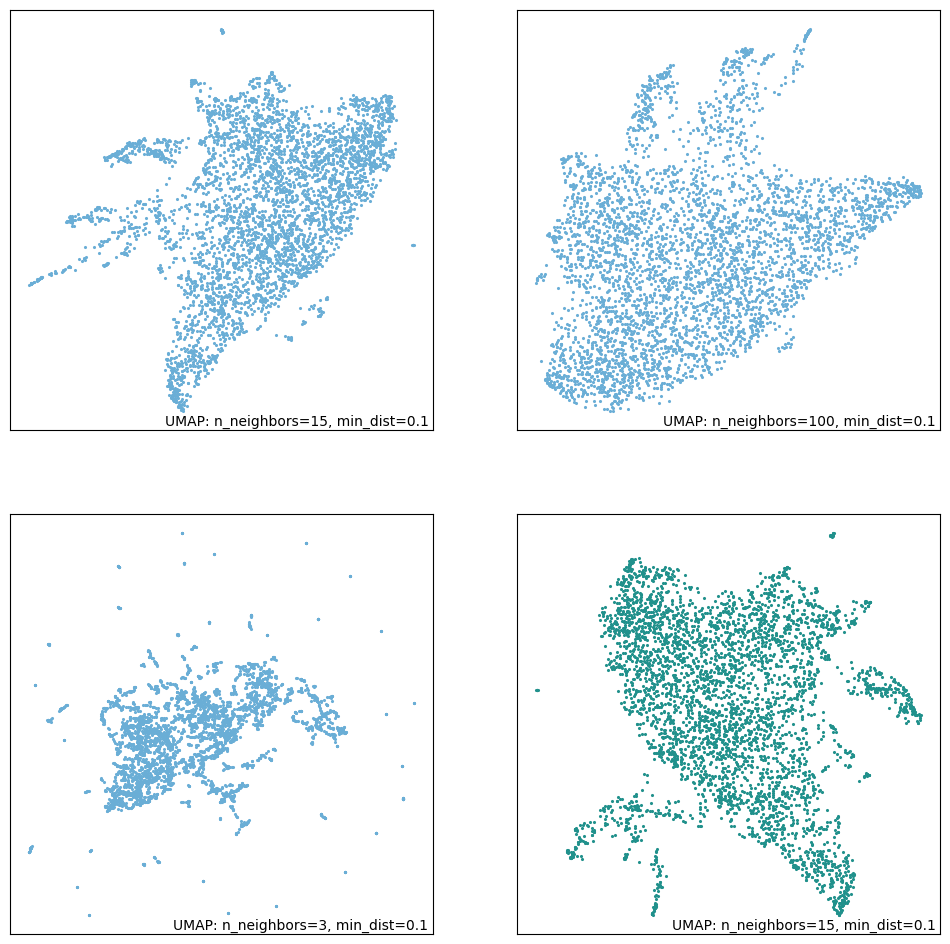

In [17]:
# fig, ax = umap.plot.plt.subplots(1, 1, figsize=(12,12))
# umap.plot.points(mapper1, ax=ax[0,0])
# umap.plot.points(mapper2, ax=ax[1,0])
# umap.plot.points(mapper3, cmap="viridis", ax=ax[2,0])

fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12))
umap.plot.points(mapper1, ax=ax[0,0])
umap.plot.points(mapper2, ax=ax[0,1])
umap.plot.points(mapper3, ax=ax[1,0])
umap.plot.points(mapper4, cmap="viridis", ax=ax[1,1])

### **Fig. 3.** UMAp 2D projection kidpack data base. Each plot changes the number of neighbors(indicated in each right bottom corner). All plots except that of  bottom right corner use the default random_state, the bottom right uses a random_state of 3312.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [18]:
#delete
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X

    Outputs:
    incvar : intracluster variance
    """
    icvar = 0 # initializing intracluster variance

    for label in np.unique(labels):
      cluster = X[labels == label] # Broadcasting to separate data in clusters
      mean = np.mean(cluster, axis=0)
      cvar = 0
      for point in cluster:
        cvar += linalg.norm(point - mean)**2 # Calculating variance of each point
      icvar += cvar
    return icvar


In [19]:
# Testing function
X = np.asarray([[1,0,9],[2,3,8],[3,-1,5],[4,-5,0], [10,-4,1]]) # Mental (not so mental haha) note: broadcasting ONLY works on arrays
labels = np.asarray([0,1,1,0,1])
# cluster = X[labels == 1] # Broadcasting to separate data in clusters
# mean = np.mean(cluster, axis=0)
# print(linalg.norm(mean)**2)
calICVar(X, labels)

144.83333333333331

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [20]:
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
for k in range(1, 11, 1):
  kmeans = skl.cluster.KMeans(n_clusters = k).fit(scaledgenes)
  cvar = calICVar(scaledgenes.to_numpy(), kmeans.labels_)
  vars.append(cvar)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Intracluster variance')

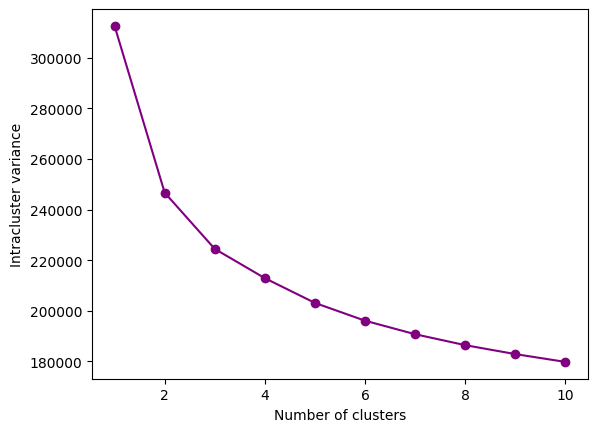

In [21]:
# elbow plot
plt.plot(range(1,11,1), vars, marker = 'o', color  = 'purple')
plt.xlabel("Number of clusters")
plt.ylabel("Intracluster variance")

### **Fig. 4.** Elbow plot for the kidpack data from 1 to 10 clusters. The plot suggest a usage of 2 clusters as it displays the maximum decrease in intracluster variance. While the intracluster variances descreases as the number of clusters, the computational costs outweights the decrease. Thus, the break in 2 clusters is optimal.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [22]:
geneclustersKM = skl.cluster.KMeans(n_clusters = 2).fit(scaledgenes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

### As we cannot plot a 74 dimension space, we reduce it to two dimensions using TSNE and UMAP

In [23]:
np.unique(geneclustersKM.labels_)

array([0, 1], dtype=int32)

Text(0, 0.5, 'Dimension 2')

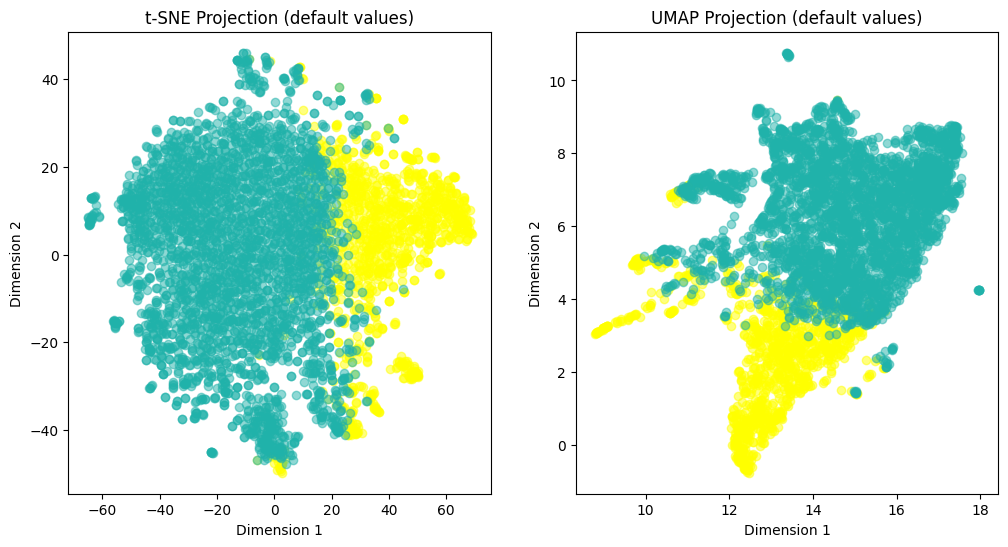

In [24]:
clusterT1 = twodproj[geneclustersKM.labels_ == 0]
clusterT2 = twodproj[geneclustersKM.labels_ == 1]

clusterU1 = mapper1.transform(scaledgenes)[geneclustersKM.labels_ == 0]
clusterU2 = mapper1.transform(scaledgenes)[geneclustersKM.labels_ == 1]

plt.figure(figsize=(12, 6))
# TSNE
plt.subplot(1, 2, 1)
plt.title('t-SNE Projection (default values)')
plt.scatter(clusterT1[:,0], clusterT1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterT2[:,0], clusterT2[:,1], color = 'lightseagreen', alpha = 0.5)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

# UMAP
plt.subplot(1, 2, 2)
plt.title('UMAP Projection (default values)')
plt.scatter(clusterU1[:,0], clusterU1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterU2[:,0], clusterU2[:,1], color = 'lightseagreen', alpha = 0.5)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")


### **Fig. 5.** Two dimensional projections of the 74-dimensional space of the normalized kidpack data grouped in 2 clusters by using the K-Means clustering method. On the left the clustering is done on the 2D projection of the TSNE package with the default parameter (Early Exaggeration of 12 and Perplexity of 30.0). On the right the clustering is done on the 2D projection of the UMAP package with the default parameters (15 neighbors and minimum distance of 0.1).The two clusters are represented by the different color (yellow and turqoise).

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [25]:
dists = sp.spatial.distance.pdist(scaledgenes, metric = 'euclidean')

In [26]:
# Obtains location of greatest distance across tissues in gene 0 (i.e. gene from the first row)
np.argmax(spd.squareform(dists)[0])
# np.argmax(spd.squareform(dists)[268])

268

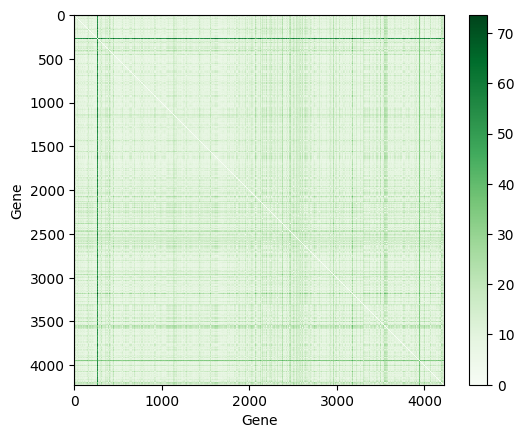

In [27]:
plt.imshow(spd.squareform(dists), interpolation='None', cmap='Greens')
plt.xlabel('Gene')
plt.ylabel('Gene')
plt.colorbar()

### **Fig. 6.** Heat map of (euclidean) distance from one normalized point of the kidpack data set to another. The graph shows that each gene has a close euclidean distance across different tissues except that gene in row 269  point which exhibits a greater distance across patient's tissues.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

Text(0.5, 0, 'Euclidean distance')

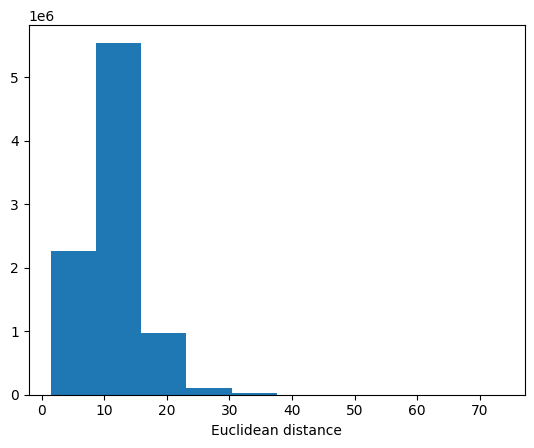

In [28]:
plt.hist(dists)
plt.xlabel('Euclidean distance')

### **Fig. 7.** Frequency of euclidean distance of scaled genes amidst tissues of the kidpack data set. The histogram is skewed to the left which indicates that the mejority of genes are relatively close to one another.

In [29]:
np.mean(dists)

11.46962029857684

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [30]:
geneclustersDBS = skl.cluster.DBSCAN(eps = 10).fit(scaledgenes)
geneclustersDBS2 = skl.cluster.DBSCAN(eps = 7, min_samples = 2).fit(scaledgenes) # Testing to see how change in parameters plasy a role in graphs
np.unique(geneclustersDBS.labels_)

array([-1,  0])

In [ ]:
print("Number of outliers: {}".format(len([geneclustersDBS.labels_ == -1])))
print("Number of clusters: {}")

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

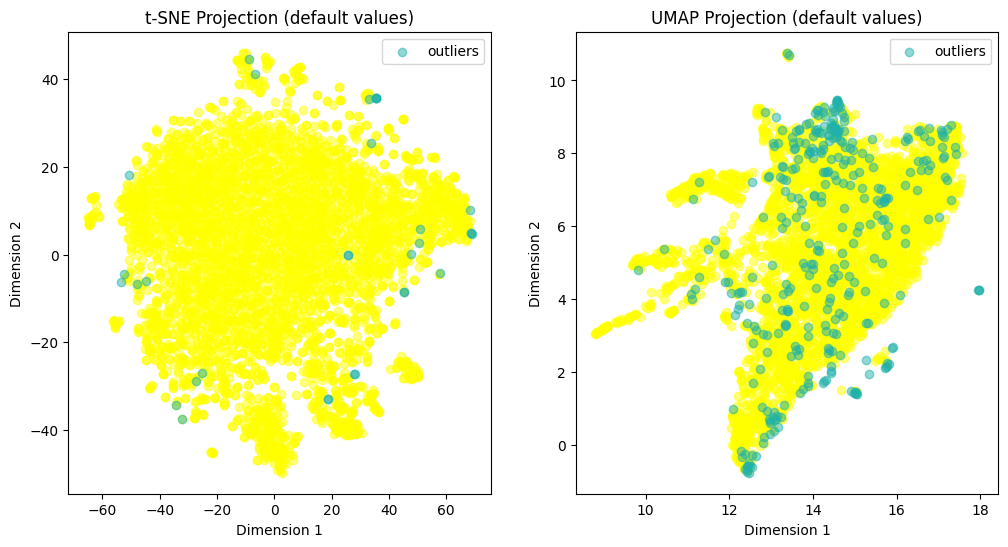

In [31]:
clusterT1 = twodproj[geneclustersDBS.labels_ == 0]
clusterT2 = twodproj[geneclustersDBS.labels_ == -1]

clusterU1 = mapper1.transform(scaledgenes)[geneclustersDBS2.labels_ == 0]
clusterU2 = mapper1.transform(scaledgenes)[geneclustersDBS2.labels_ == -1]

plt.figure(figsize=(12, 6))
# TSNE
plt.subplot(1, 2, 1)
plt.title('t-SNE Projection (default values)')
plt.scatter(clusterT1[:,0], clusterT1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterT2[:,0], clusterT2[:,1], color = 'lightseagreen', alpha = 0.5, label = "outliers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

# UMAP
plt.subplot(1, 2, 2)
plt.title('UMAP Projection (default values)')
plt.scatter(clusterU1[:,0], clusterU1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterU2[:,0], clusterU2[:,1], color = 'lightseagreen', alpha = 0.5, label = "outliers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

### **Fig 8.** Two dimensional projections of the 74-dimensional space of the normalized kidpack data grouped in 2 clusters by using the DBSCAN clustering method. On the left the clustering is done on the 2D projection of the TSNE package with the default parameter (Early Exaggeration of 12 and Perplexity of 30.0). On the right the clustering is done on the 2D projection of the UMAP package with the default parameters (15 neighbors and minimum distance of 0.1). The DBSCAN yielded only one cluster (yellow) and the rest are outliers (turqoise).

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

choose ward linkage and plot the dendrogram of the clusters

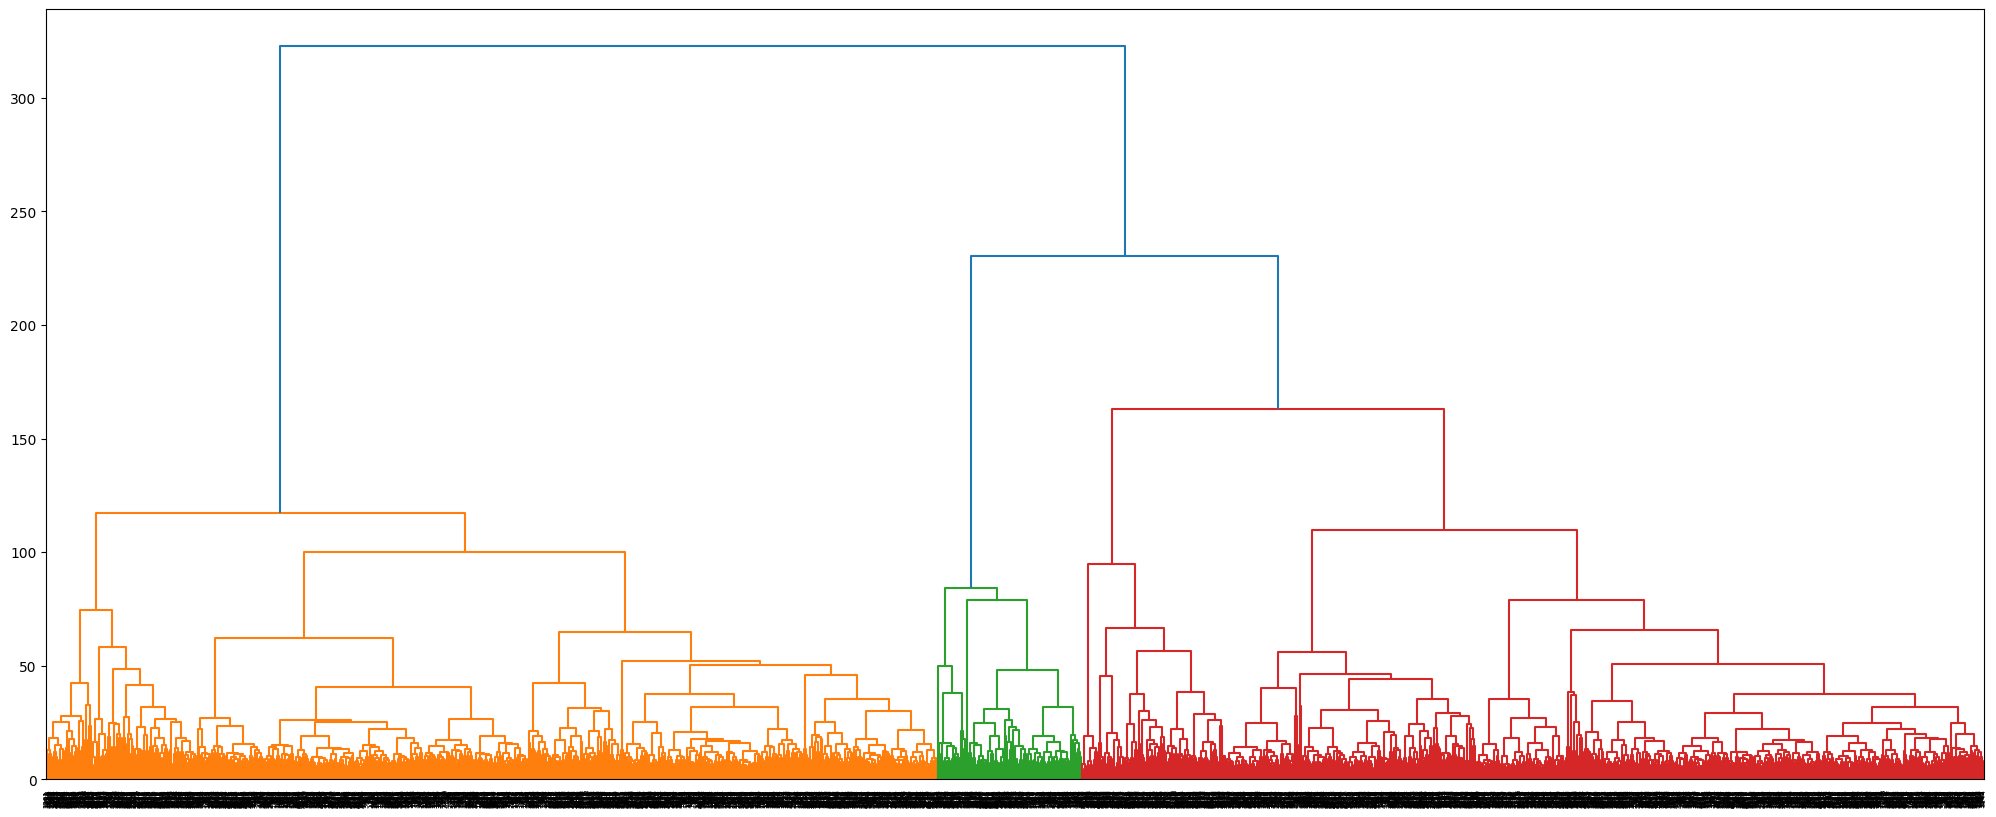

In [33]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
plt.xlabel('Genes')
plt.ylabel('Euclidean distance')
dn = dendrogram(Z)

### **Fig. 9.** Dendogram of the normalized kidpack data set of the genes and their respective Euclidean distance using the 'ward' method. The graph suggests that the optimal cutoff for clusters, based on the greatest change in height of the graphs, is at 3 clusters which would happen at a Euclidean distance of 200.

repeat with a different linkage and comment on differences

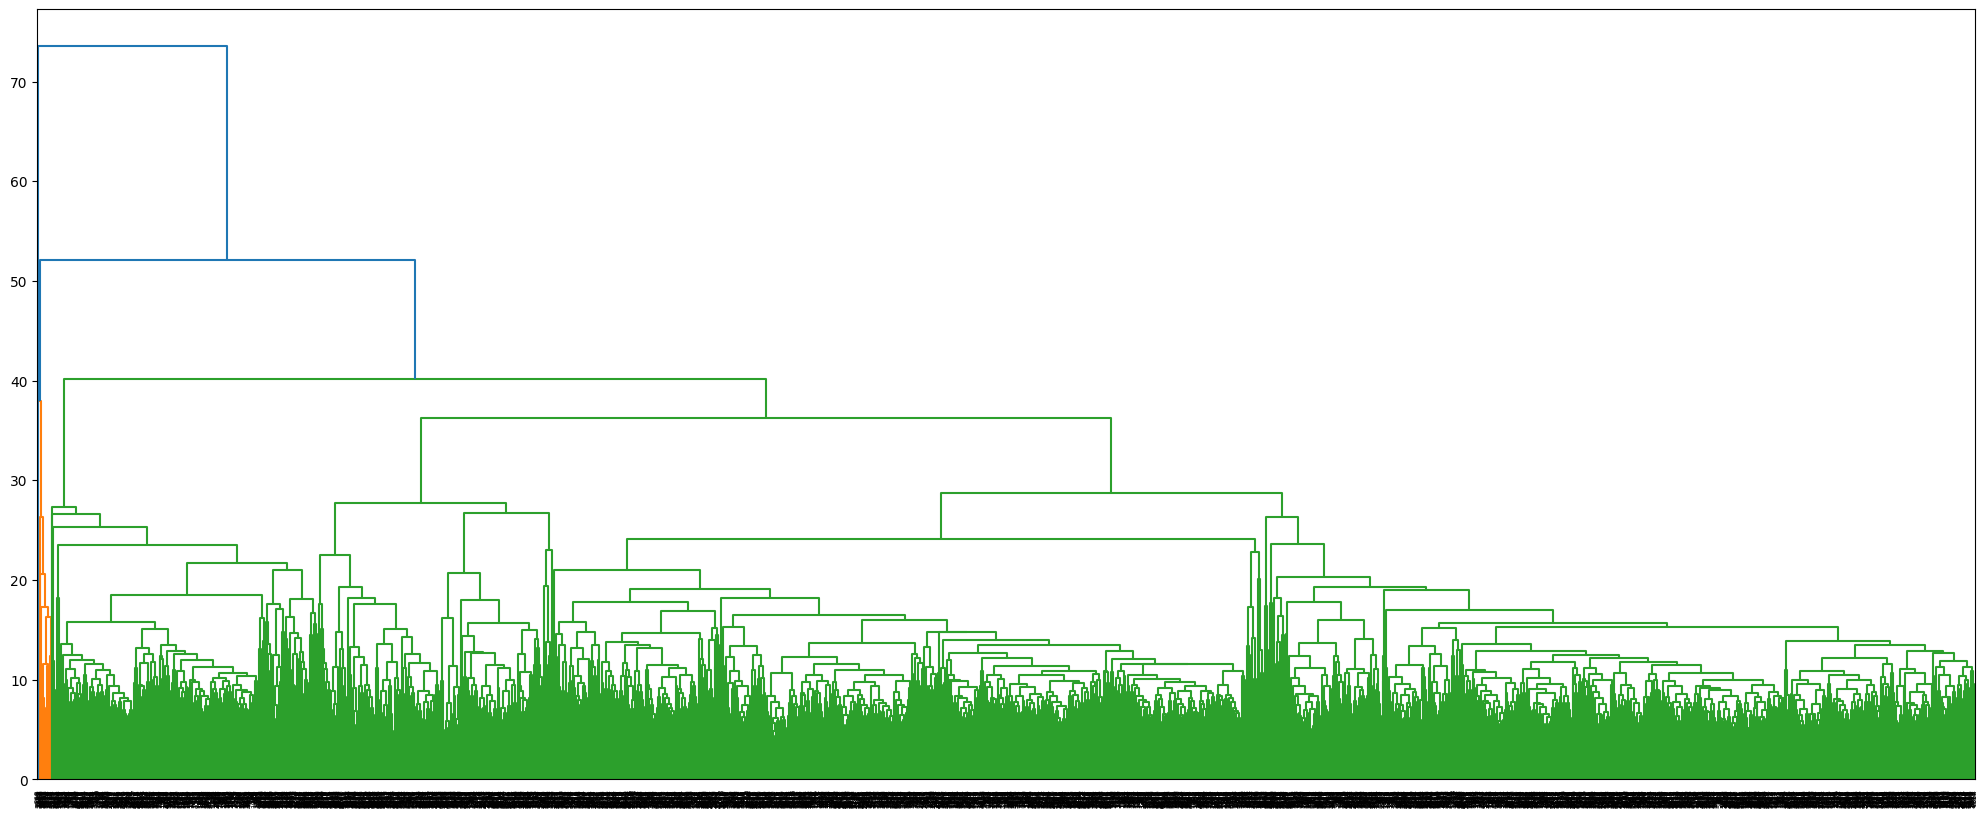

In [41]:
Z = linkage(scaledgenes, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### **Fig. 10.** Dendogram of the normalized kidpack data set of the genes and their respective Euclidean distance using the 'complete' method. The graph suggests that the optimal cutoff for clusters, based on the greatest change in height of the graphs, is at 2 clusters which would happen at a Euclidean distance of 60.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [44]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=2).fit(scaledgenes)

In [47]:
np.unique(geneclustersAg.labels_)

array([0, 1])

## VI-c plot the 2D TSNE projection colorcoded as before

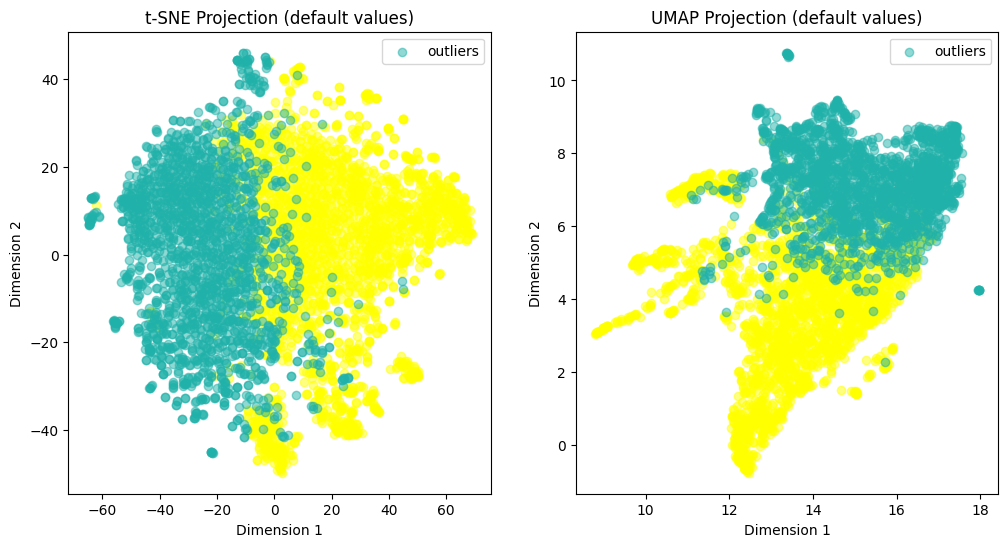

In [48]:
clusterT1 = twodproj[geneclustersAg.labels_ == 0]
clusterT2 = twodproj[geneclustersAg.labels_ == 1]

clusterU1 = mapper1.transform(scaledgenes)[geneclustersAg.labels_ == 0]
clusterU2 = mapper1.transform(scaledgenes)[geneclustersAg.labels_ == 1]

plt.figure(figsize=(12, 6))
# TSNE
plt.subplot(1, 2, 1)
plt.title('t-SNE Projection (default values)')
plt.scatter(clusterT1[:,0], clusterT1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterT2[:,0], clusterT2[:,1], color = 'lightseagreen', alpha = 0.5, label = "outliers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

# UMAP
plt.subplot(1, 2, 2)
plt.title('UMAP Projection (default values)')
plt.scatter(clusterU1[:,0], clusterU1[:,1], color = 'yellow', alpha = 0.5)
plt.scatter(clusterU2[:,0], clusterU2[:,1], color = 'lightseagreen', alpha = 0.5, label = "outliers")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()

### **Fig 11.** Two dimensional projections of the 74-dimensional space of the normalized kidpack data grouped in 2 clusters by using the Agglomerative clustering method. On the left the clustering is done on the 2D projection of the TSNE package with the default parameter (Early Exaggeration of 12 and Perplexity of 30.0). On the right the clustering is done on the 2D projection of the UMAP package with the default parameters (15 neighbors and minimum distance of 0.1). There are two clusters (yellow and turqoise) since the optimal number of clusters was the same as that determined through the elbow plot generated to choose the number of clusters for the KMeans method.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

#### Three clustering methods were employed: KMeans, DBSCAN and Agglomerative, each was visualized in two (TSNE and UMAP) 2-dimensional projections of the 74-dimension space. In such projections the two different clusters (yellow and turqoise) were better appreciated using the KMeans and Agglomerative clustering methods. On the other hand, the DBSCAN method yielded a single cluster with a couple of outliers. While it may be argued that for our 2D projection the most "useful" method is either KMeans or Agglomerative, the reality is that a 2D projection of a 74D space is very limited and it likely poses a considerable information loss. In higher dimensional spaces, the DBSCAN clustering might be more "useful" or closer to the "true" clustering (if any exist).